In [56]:
import sys
print(sys.version)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


     Passengers
0           112
1           118
2           132
3           129
4           121
..          ...
139         606
140         508
141         461
142         390
143         432

[144 rows x 1 columns]


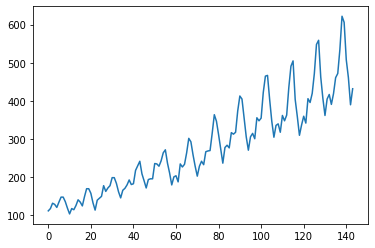

In [57]:
np.random.seed(7)

dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
print(dataframe)
plt.plot(dataframe)
plt.show()

In [58]:
dataset=dataframe.values.astype('float32')
print(dataset)
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]
 [104.]
 [118.]
 [115.]
 [126.]
 [141.]
 [135.]
 [125.]
 [149.]
 [170.]
 [170.]
 [158.]
 [133.]
 [114.]
 [140.]
 [145.]
 [150.]
 [178.]
 [163.]
 [172.]
 [178.]
 [199.]
 [199.]
 [184.]
 [162.]
 [146.]
 [166.]
 [171.]
 [180.]
 [193.]
 [181.]
 [183.]
 [218.]
 [230.]
 [242.]
 [209.]
 [191.]
 [172.]
 [194.]
 [196.]
 [196.]
 [236.]
 [235.]
 [229.]
 [243.]
 [264.]
 [272.]
 [237.]
 [211.]
 [180.]
 [201.]
 [204.]
 [188.]
 [235.]
 [227.]
 [234.]
 [264.]
 [302.]
 [293.]
 [259.]
 [229.]
 [203.]
 [229.]
 [242.]
 [233.]
 [267.]
 [269.]
 [270.]
 [315.]
 [364.]
 [347.]
 [312.]
 [274.]
 [237.]
 [278.]
 [284.]
 [277.]
 [317.]
 [313.]
 [318.]
 [374.]
 [413.]
 [405.]
 [355.]
 [306.]
 [271.]
 [306.]
 [315.]
 [301.]
 [356.]
 [348.]
 [355.]
 [422.]
 [465.]
 [467.]
 [404.]
 [347.]
 [305.]
 [336.]
 [340.]
 [318.]
 [362.]
 [348.]
 [363.]
 [435.]
 [491.]
 [505.]
 [404.]
 [359.]
 [310.]
 [337.]
 [360.]
 [342.]
 [406.]
 [396.]
 [420.]


In [59]:
trainLen=int(len(dataset)*0.7)
testLen=len(dataset)-trainLen
train=dataset[0:trainLen,:]
test=dataset[trainLen:len(dataset),:]

In [60]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [61]:
look_back=7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)

[[0.01544401 0.02702703 0.05405405 0.04826255 0.03281853 0.05984557
  0.08494207]
 [0.02702703 0.05405405 0.04826255 0.03281853 0.05984557 0.08494207
  0.08494207]
 [0.05405405 0.04826255 0.03281853 0.05984557 0.08494207 0.08494207
  0.06177607]
 [0.04826255 0.03281853 0.05984557 0.08494207 0.08494207 0.06177607
  0.02895753]
 [0.03281853 0.05984557 0.08494207 0.08494207 0.06177607 0.02895753
  0.        ]
 [0.05984557 0.08494207 0.08494207 0.06177607 0.02895753 0.
  0.02702703]
 [0.08494207 0.08494207 0.06177607 0.02895753 0.         0.02702703
  0.02123553]
 [0.08494207 0.06177607 0.02895753 0.         0.02702703 0.02123553
  0.04247104]
 [0.06177607 0.02895753 0.         0.02702703 0.02123553 0.04247104
  0.07142857]
 [0.02895753 0.         0.02702703 0.02123553 0.04247104 0.07142857
  0.05984557]
 [0.         0.02702703 0.02123553 0.04247104 0.07142857 0.05984557
  0.04054055]
 [0.02702703 0.02123553 0.04247104 0.07142857 0.05984557 0.04054055
  0.08687258]
 [0.02123553 0.04247104 

In [62]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)

(92, 1, 7)


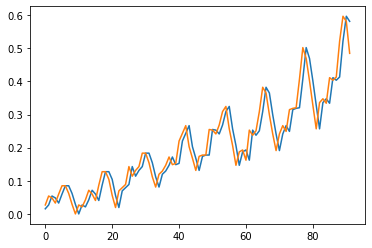

In [63]:
plt.plot(trainX[:,0,0])
plt.plot(trainX[:,0,1])
plt.show()

In [64]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.0255
Epoch 2/100
92/92 - 0s - loss: 0.0080
Epoch 3/100
92/92 - 0s - loss: 0.0069
Epoch 4/100
92/92 - 0s - loss: 0.0062
Epoch 5/100
92/92 - 0s - loss: 0.0058
Epoch 6/100
92/92 - 0s - loss: 0.0054
Epoch 7/100
92/92 - 0s - loss: 0.0052
Epoch 8/100
92/92 - 0s - loss: 0.0049
Epoch 9/100
92/92 - 0s - loss: 0.0048
Epoch 10/100
92/92 - 0s - loss: 0.0047
Epoch 11/100
92/92 - 0s - loss: 0.0046
Epoch 12/100
92/92 - 0s - loss: 0.0045
Epoch 13/100
92/92 - 0s - loss: 0.0044
Epoch 14/100
92/92 - 0s - loss: 0.0044
Epoch 15/100
92/92 - 0s - loss: 0.0043
Epoch 16/100
92/92 - 0s - loss: 0.0042
Epoch 17/100
92/92 - 0s - loss: 0.0042
Epoch 18/100
92/92 - 0s - loss: 0.0042
Epoch 19/100
92/92 - 0s - loss: 0.0041
Epoch 20/100
92/92 - 0s - loss: 0.0041
Epoch 21/100
92/92 - 0s - loss: 0.0040
Epoch 22/100
92/92 - 0s - loss: 0.0039
Epoch 23/100
92/92 - 0s - loss: 0.0038
Epoch 24/100
92/92 - 0s - loss: 0.0038
Epoch 25/100
92/92 - 0s - loss: 0.0037
Epoch 26/100
92/92 - 0s - loss: 0.

In [65]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.93 RMSE
Test Score: 57.35 RMSE


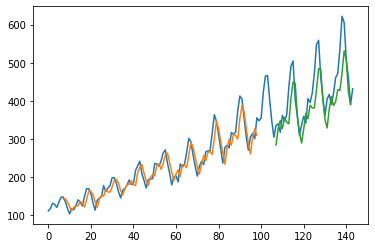

In [66]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()